In [2]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

## Классификатор решения пойти гулять на основе прогноза погоды

### 1 и 2 задания

In [2]:
X_train = np.array([[1, 0],
                    [0, 0],
                    [0, 1],
                    [1, 1],
                    [0, 0]])
y_train = np.array([[0], [1], [1], [1], [1]])

In [3]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

[Text(0.4, 0.8333333333333334, 'X[0] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.6, 0.5, 'X[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

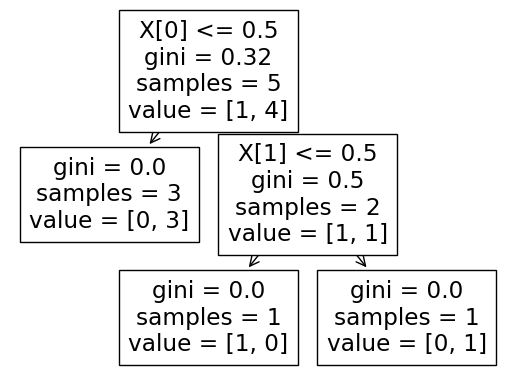

In [4]:
tree.plot_tree(clf)

In [5]:
clf.feature_importances_

array([0.375, 0.625])

## Датасет музыкальных композиций

### 3 задание

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import mean_squared_error, accuracy_score

# Максимальное количество отображаемых столбцов
pd.set_option('display.max_columns', 13)
# Максимальное количество отображаемых строк
pd.set_option('display.max_rows', 10)
# Максимальная ширина столбца
pd.set_option('display.max_colwidth', 45)
# Максимальная ширина отображения
pd.set_option('display.width', 80)

In [4]:
df = pd.read_csv("light_music.csv")
df_train, df_test = train_test_split(df, train_size=0.8, random_state=1)
y_train, y_test = df_train['popularity'], df_test['popularity']
df_train.drop(columns='popularity', inplace=True)
df_test.drop(columns='popularity', inplace=True)
df_train

,duration_ms,explicit,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1233,195456,False,0.648,0.473,0,-14.604,...,0.917000,0.136,0.363,112.998,4,electro
1056,176561,False,0.723,0.809,7,-3.081,...,0.001230,0.565,0.274,98.007,4,electro
1686,185474,False,0.568,0.669,2,-5.698,...,0.000000,0.115,0.405,149.969,4,electro
187,205280,False,0.736,0.722,10,-5.908,...,0.000074,0.137,0.448,112.921,4,blues
3840,160801,False,0.533,0.930,1,-4.208,...,0.000000,0.790,0.435,92.591,4,punk-rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,157648,False,0.480,0.369,7,-8.766,...,0.000000,0.100,0.548,159.687,4,pop
2763,245016,False,0.531,0.790,10,-7.213,...,0.000000,0.301,0.339,79.942,4,pop
905,237659,False,0.429,0.575,3,-7.626,...,0.003530,0.102,0.155,139.965,4,blues
3980,235253,False,0.481,0.715,11,-4.729,...,0.000000,0.243,0.818,135.802,4,punk-rock


In [5]:
Enc = OrdinalEncoder()
Enc.fit(df_train[['explicit', 'track_genre']])

OrdinalEncoder()

In [6]:
Enc.categories_

[array([False,  True]),
 array(['blues', 'electro', 'pop', 'punk-rock', 'spanish'], dtype=object)]

In [7]:
df_train[['explicit', 'track_genre']] = Enc.transform(df_train[['explicit', 'track_genre']])
df_test[['explicit', 'track_genre']] = Enc.transform(df_test[['explicit', 'track_genre']])

In [8]:
df_train

,duration_ms,explicit,danceability,energy,key,loudness,...,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1233,195456,0.0,0.648,0.473,0,-14.604,...,0.917000,0.136,0.363,112.998,4,1.0
1056,176561,0.0,0.723,0.809,7,-3.081,...,0.001230,0.565,0.274,98.007,4,1.0
1686,185474,0.0,0.568,0.669,2,-5.698,...,0.000000,0.115,0.405,149.969,4,1.0
187,205280,0.0,0.736,0.722,10,-5.908,...,0.000074,0.137,0.448,112.921,4,0.0
3840,160801,0.0,0.533,0.930,1,-4.208,...,0.000000,0.790,0.435,92.591,4,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,157648,0.0,0.480,0.369,7,-8.766,...,0.000000,0.100,0.548,159.687,4,2.0
2763,245016,0.0,0.531,0.790,10,-7.213,...,0.000000,0.301,0.339,79.942,4,2.0
905,237659,0.0,0.429,0.575,3,-7.626,...,0.003530,0.102,0.155,139.965,4,0.0
3980,235253,0.0,0.481,0.715,11,-4.729,...,0.000000,0.243,0.818,135.802,4,3.0


### 4 и 5 задания
Построение дерева под задачу регрессии:

In [9]:
clf2 = DecisionTreeRegressor(random_state=1)
clf2.fit(df_train, y_train)

DecisionTreeRegressor(random_state=1)

In [10]:
print(mean_squared_error(y_test, clf2.predict(df_test)))

882.1089755234448


In [11]:
min_MSE = mean_squared_error(y_test, clf2.predict(df_test))
min_MSE_depth = None
for max_depth in range(1, 26):
    clf3 = DecisionTreeRegressor(random_state=1, max_depth=max_depth)
    clf3.fit(df_train, y_train)
    MSE = mean_squared_error(y_test, clf3.predict(df_test))
    if min_MSE > MSE:
        min_MSE = MSE
        min_MSE_depth = max_depth
print(f'minimum MSE: {min_MSE}, depth = {min_MSE_depth}')

minimum MSE: 705.9118548904995, depth = 10


### 6 и 7 задания
Построение дерева под задачу классификации:

In [26]:
y_train_bin = y_train.copy()
for i in range(len(y_train_bin)): y_train_bin.iloc[i] = 'True' if (y_train.iloc[i] > 50) else 'False'
y_test_bin = y_test.copy()
for i in range(len(y_test_bin)): y_test_bin.iloc[i] = 'True' if (y_test.iloc[i] > 50) else 'False'

In [27]:
print(f'Ratio of classes in y_train_bin: \n{y_train_bin.value_counts()} \n')
print(f'Ratio of classes in y_test_bin: \n{y_test_bin.value_counts()}')

Ratio of classes in y_train_bin: 
False    2373
True     1627
Name: popularity, dtype: int64 

Ratio of classes in y_test_bin: 
False    599
True     401
Name: popularity, dtype: int64


In [40]:
min_acc = np.inf
min_acc_depth = None
for max_depth in range(1, 26):
    clf3_bin = DecisionTreeClassifier(random_state=1, max_depth=max_depth)
    clf3_bin.fit(df_train, y_train_bin)
    acc = accuracy_score(y_test_bin, clf3_bin.predict(df_test))
    if min_acc > acc:
        min_acc = acc
        min_acc_depth = max_depth
print(f'minimum accuracy: {min_acc}, depth = {min_acc_depth}')

minimum accuracy: 0.599, depth = 1


In [39]:
clf3_bin = DecisionTreeClassifier(random_state=1, max_depth=min_acc_depth)
clf3_bin.fit(df_train, y_train_bin)
print('feature - relative importance')
print('--------------------')
for i in range(len(df_train.keys())):
    print(f'{df_train.keys()[i]} - {clf3.feature_importances_[i]/max(clf3.feature_importances_)}')

feature - relative importance
--------------------
duration_ms - 0.7752472435623663
explicit - 0.029030638757535757
danceability - 0.5849018207974849
energy - 0.5765074174125839
key - 0.3459328988890098
loudness - 0.6132029920124906
mode - 0.06973459490225319
speechiness - 0.5386998052874499
acousticness - 1.0
instrumentalness - 0.3949183870742965
liveness - 0.673382266242027
valence - 0.7048120831504361
tempo - 0.7565450718608442
time_signature - 0.047924537056695755
track_genre - 0.38202395329258765
